In [1]:
import pathlib
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow.keras as keras 

!pip install -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 71kB 6.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=5d86cddcd5e5755c5102e6d4c4c82cd1efa8f67ed03fd88334a3ed528288ac0b
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=83fa406a1f895ee147c2f2fc004b19eb9849a56153815496fc19477bf1a7c579
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
#----------------------#

In [4]:
# Using images stored on Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#----------------------#

In [3]:
# Dataset generation (train, validation et test)

# This function will create a train set, a validation set and a test set
# with data augmentation and the preprocessing function of the model,
# which will be used thanks to transfer learning.

path_google_drive = "/content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P6/Projet/Data/"

def dataset_for_keras_model(model_preprocessing, batch_size_int, img_size_int, nbr_class):

  # Data augmentation:
  # only for training images
  datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(
      # rescale=1/255,  # normalization
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      validation_split=0,
      preprocessing_function=model_preprocessing
  )

  test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      # rescale=1/255,  # normalization
      validation_split=0,
      preprocessing_function=model_preprocessing
  )

  # Train set:
  if (nbr_class == 120):
    path = path_google_drive + "Images_split/train/"
  else:
    path = path_google_drive + "Images_few_" + str(nbr_class) + "/train/"

  x_train = datagen_train.flow_from_directory(
      path,
      target_size=(img_size_int, img_size_int), # resizing
      batch_size=batch_size_int,
      class_mode="categorical",
      shuffle=True,
      seed=0,
      subset='training'
  )

  # Validation set:
  if (nbr_class == 120):
    path = path_google_drive + "Images_split/val/"
  else:
    path = path_google_drive + "Images_few_" + str(nbr_class) + "/val/"  

  x_val = test_datagen.flow_from_directory(
      path,
      batch_size=batch_size_int,
      class_mode="categorical",
      target_size=(img_size_int, img_size_int), # resizing
      seed=0,
      subset='training'
  )

  # Test set:
  if (nbr_class == 120):
    path = path_google_drive + "Images_split/test/"
  else:
    path = path_google_drive + "Images_few_" + str(nbr_class) + "/test/"  

  x_test = test_datagen.flow_from_directory(
      path,
      batch_size=batch_size_int,
      class_mode="categorical",
      target_size=(img_size_int, img_size_int), # resizing
      seed=0,
      subset='training'
  )

  return x_train, x_val, x_test

In [ ]:
#----------------------#

In [ ]:
# Transfer learning without the top layers

In [ ]:
# We will compare 5 models with the same kind of dataset used for our
# CNN from scratch (i.e. 10 dog breeds)
# These 5 models are:
# - VGG16
# - ResNet50
# - InceptionV3
# - EfficientNetB0
# - Xception

In [ ]:
# VGG16

base_model_vgg16 = keras.applications.vgg16.VGG16(
  weights="imagenet",
  include_top=False
)

x = keras.layers.GlobalAveragePooling2D()(base_model_vgg16.output)

output_ = keras.layers.Dense(10, activation="softmax")(x)

model_vgg16 = keras.Model(inputs=base_model_vgg16.input, outputs=output_)

In [ ]:
# ResNet50

base_model_resnet50 = keras.applications.resnet50.ResNet50(
  weights="imagenet",
  include_top=False
)

x = keras.layers.GlobalAveragePooling2D()(base_model_resnet50.output)

output_ = keras.layers.Dense(10, activation="softmax")(x)

model_resnet50 = keras.Model(inputs=base_model_resnet50.input, outputs=output_)

In [ ]:
# InceptionV3

base_model_inceptionv3 = keras.applications.inception_v3.InceptionV3(
  weights="imagenet",
  include_top=False
)

x = keras.layers.GlobalAveragePooling2D()(base_model_inceptionv3.output)

output_ = keras.layers.Dense(10, activation="softmax")(x)

model_inceptionv3 = keras.Model(inputs=base_model_inceptionv3.input, outputs=output_)

In [ ]:
# EfficientNetB0

base_model_efficientnet = keras.applications.efficientnet.EfficientNetB0(
  weights="imagenet",
  include_top=False
)

x = keras.layers.GlobalAveragePooling2D()(base_model_efficientnet.output)

output_ = keras.layers.Dense(10, activation="softmax")(x)

model_efficientnet = keras.Model(inputs=base_model_efficientnet.input, outputs=output_)

In [ ]:
# Xception

base_model_xception = keras.applications.xception.Xception(
  weights="imagenet",
  include_top=False
)

x = keras.layers.GlobalAveragePooling2D()(base_model_xception.output)

output_ = keras.layers.Dense(10, activation="softmax")(x)

model_xception = keras.Model(inputs=base_model_xception.input, outputs=output_)

In [ ]:
#----------------------#

In [ ]:
# First part of the training
# The first layers (from transfert learning) can't be trainable

for layer in base_model_vgg16.layers:
  layer.trainable = False

for layer in base_model_resnet50.layers:
  layer.trainable = False

for layer in base_model_inceptionv3.layers:
  layer.trainable = False

for layer in base_model_efficientnet.layers:
  layer.trainable = False

for layer in base_model_xception.layers:
  layer.trainable = False

In [ ]:
optimizer_ = keras.optimizers.Adam()

model_vgg16.compile(
    optimizer = optimizer_,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_resnet50.compile(
    optimizer = optimizer_,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_inceptionv3.compile(
    optimizer = optimizer_,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_efficientnet.compile(
    optimizer = optimizer_,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_xception.compile(
    optimizer = optimizer_,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Dataset for 10 dog breeds
x_train_vgg16, x_val_vgg16, x_test_vgg16 = dataset_for_keras_model(keras.applications.vgg16.preprocess_input, 10, 224, 10)

history_vgg16 = model_vgg16.fit(
    x_train_vgg16,
    epochs=10,
    batch_size=batch_size_,
    validation_data=x_val_vgg16,
    callbacks=[keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]
)

Found 1025 images belonging to 10 classes.
Found 338 images belonging to 10 classes.
Found 350 images belonging to 10 classes.
Epoch 1/10
103/103 [==============================] - 21s 197ms/step - loss: 7.3430 - accuracy: 0.2178 - val_loss: 1.7963 - val_accuracy: 0.7012
Epoch 2/10
103/103 [==============================] - 20s 198ms/step - loss: 1.2718 - accuracy: 0.7039 - val_loss: 1.1852 - val_accuracy: 0.7899
Epoch 3/10
103/103 [==============================] - 20s 197ms/step - loss: 0.8252 - accuracy: 0.8025 - val_loss: 0.8314 - val_accuracy: 0.8432
Epoch 4/10
103/103 [==============================] - 20s 192ms/step - loss: 0.5544 - accuracy: 0.8687 - val_loss: 0.7395 - val_accuracy: 0.8609
Epoch 5/10
103/103 [==============================] - 20s 193ms/step - loss: 0.3890 - accuracy: 0.9038 - val_loss: 0.5916 - val_accuracy: 0.8846
Epoch 6/10
103/103 [==============================] - 20s 192ms/step - loss: 0.3630 - accuracy: 0.9088 - val_loss: 0.7227 - val_accuracy: 0.8728
Epo

In [ ]:
# Dataset for 10 dog breeds
x_train_resnet50, x_val_resnet50, x_test_resnet50 = dataset_for_keras_model(keras.applications.resnet50.preprocess_input, 10, 224, 10)

history_resnet50 = model_resnet50.fit(
    x_train_resnet50,
    epochs=10,
    batch_size=batch_size_,
    validation_data=x_val_resnet50,
    callbacks=[keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]
)

Found 1025 images belonging to 10 classes.
Found 338 images belonging to 10 classes.
Found 350 images belonging to 10 classes.
Epoch 1/10
103/103 [==============================] - 24s 206ms/step - loss: 1.4528 - accuracy: 0.6316 - val_loss: 0.2283 - val_accuracy: 0.9320
Epoch 2/10
103/103 [==============================] - 20s 195ms/step - loss: 0.2009 - accuracy: 0.9350 - val_loss: 0.1287 - val_accuracy: 0.9615
Epoch 3/10
103/103 [==============================] - 20s 198ms/step - loss: 0.0561 - accuracy: 0.9828 - val_loss: 0.1300 - val_accuracy: 0.9527
Epoch 4/10
103/103 [==============================] - 20s 197ms/step - loss: 0.0591 - accuracy: 0.9800 - val_loss: 0.1384 - val_accuracy: 0.9556


In [ ]:
# Dataset for 10 dog breeds
x_train_inceptionv3, x_val_inceptionv3, x_test_inceptionv3 = dataset_for_keras_model(keras.applications.inception_v3.preprocess_input, 10, 299, 10)

history_inceptionv3 = model_inceptionv3.fit(
    x_train_inceptionv3,
    epochs=10,
    batch_size=batch_size_,
    validation_data=x_val_inceptionv3,
    callbacks=[keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]
)

Found 1025 images belonging to 10 classes.
Found 338 images belonging to 10 classes.
Found 350 images belonging to 10 classes.
Epoch 1/10
103/103 [==============================] - 35s 299ms/step - loss: 1.0374 - accuracy: 0.7373 - val_loss: 0.0674 - val_accuracy: 0.9911
Epoch 2/10
103/103 [==============================] - 29s 277ms/step - loss: 0.1008 - accuracy: 0.9854 - val_loss: 0.0323 - val_accuracy: 0.9970
Epoch 3/10
103/103 [==============================] - 29s 277ms/step - loss: 0.0680 - accuracy: 0.9839 - val_loss: 0.0268 - val_accuracy: 0.9882
Epoch 4/10
103/103 [==============================] - 29s 280ms/step - loss: 0.0447 - accuracy: 0.9906 - val_loss: 0.0262 - val_accuracy: 0.9911
Epoch 5/10
103/103 [==============================] - 30s 290ms/step - loss: 0.0346 - accuracy: 0.9938 - val_loss: 0.0192 - val_accuracy: 0.9941
Epoch 6/10
103/103 [==============================] - 29s 279ms/step - loss: 0.0274 - accuracy: 0.9945 - val_loss: 0.0220 - val_accuracy: 0.9941
Epo

In [ ]:
# Dataset for 10 dog breeds
x_train_efficientnet, x_val_efficientnet, x_test_efficientnet = dataset_for_keras_model(keras.applications.efficientnet.preprocess_input, 10, 299, 10)

history_efficientnet = model_efficientnet.fit(
    x_train_efficientnet,
    epochs=10,
    batch_size=batch_size_,
    validation_data=x_val_efficientnet,
    callbacks=[keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]
)

Found 1025 images belonging to 10 classes.
Found 338 images belonging to 10 classes.
Found 350 images belonging to 10 classes.
Epoch 1/10
103/103 [==============================] - 36s 291ms/step - loss: 0.6795 - accuracy: 0.7839 - val_loss: 0.0578 - val_accuracy: 0.9882
Epoch 2/10
103/103 [==============================] - 28s 275ms/step - loss: 0.0630 - accuracy: 0.9829 - val_loss: 0.0546 - val_accuracy: 0.9911
Epoch 3/10
103/103 [==============================] - 28s 270ms/step - loss: 0.0486 - accuracy: 0.9934 - val_loss: 0.0467 - val_accuracy: 0.9911
Epoch 4/10
103/103 [==============================] - 28s 272ms/step - loss: 0.0381 - accuracy: 0.9932 - val_loss: 0.0606 - val_accuracy: 0.9793
Epoch 5/10
103/103 [==============================] - 29s 279ms/step - loss: 0.0293 - accuracy: 0.9942 - val_loss: 0.0537 - val_accuracy: 0.9793


In [ ]:
# Dataset for 10 dog breeds
x_train_xception, x_val_xception, x_test_xception = dataset_for_keras_model(keras.applications.xception.preprocess_input, 10, 299, 10)

history_xception = model_xception.fit(
    x_train_xception,
    epochs=10,
    batch_size=10,
    validation_data=x_test_xception,
    callbacks=[keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]
)

Found 1025 images belonging to 10 classes.
Found 338 images belonging to 10 classes.
Found 350 images belonging to 10 classes.
Epoch 1/10
103/103 [==============================] - 35s 300ms/step - loss: 0.5768 - accuracy: 0.8373 - val_loss: 0.0230 - val_accuracy: 0.9914
Epoch 2/10
103/103 [==============================] - 30s 287ms/step - loss: 0.0369 - accuracy: 0.9868 - val_loss: 0.0148 - val_accuracy: 0.9943
Epoch 3/10
103/103 [==============================] - 30s 292ms/step - loss: 0.0166 - accuracy: 0.9974 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 4/10
103/103 [==============================] - 30s 292ms/step - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.0159 - val_accuracy: 0.9943
Epoch 5/10
103/103 [==============================] - 29s 283ms/step - loss: 0.0064 - accuracy: 0.9993 - val_loss: 0.0142 - val_accuracy: 0.9971
Epoch 6/10
103/103 [==============================] - 29s 282ms/step - loss: 0.0189 - accuracy: 0.9959 - val_loss: 0.0130 - val_accuracy: 0.9943
Epo

In [ ]:
#----------------------#

In [ ]:
# Second part of the training
# The first layers (from transfert learning) will be trained

# We will make this fine tuning, only for VGG16 and ResNet50.
# If we do it to the others models, it will destroy the accuracy,
# which is already very high.

for layer in base_model_vgg16.layers:
  layer.trainable = True

for layer in base_model_resnet50.layers:
  layer.trainable = True

In [ ]:
optimizer_ = keras.optimizers.Adam(learning_rate=1e-6)

model_vgg16.compile(
    optimizer = optimizer_,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_resnet50.compile(
    optimizer = optimizer_,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history_vgg16 = model_vgg16.fit(
    x_train_vgg16,
    epochs=100,
    batch_size=batch_size_,
    validation_data=x_val_vgg16,
    callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/100
103/103 [==============================] - 25s 227ms/step - loss: 0.1206 - accuracy: 0.9615 - val_loss: 0.4507 - val_accuracy: 0.9053
Epoch 2/100
103/103 [==============================] - 22s 215ms/step - loss: 0.0736 - accuracy: 0.9787 - val_loss: 0.4422 - val_accuracy: 0.9083
Epoch 3/100
103/103 [==============================] - 22s 214ms/step - loss: 0.0797 - accuracy: 0.9687 - val_loss: 0.4265 - val_accuracy: 0.9024
Epoch 4/100
103/103 [==============================] - 22s 215ms/step - loss: 0.0428 - accuracy: 0.9899 - val_loss: 0.4308 - val_accuracy: 0.9053
Epoch 5/100
103/103 [==============================] - 23s 221ms/step - loss: 0.0617 - accuracy: 0.9857 - val_loss: 0.4238 - val_accuracy: 0.9053
Epoch 6/100
103/103 [==============================] - 22s 218ms/step - loss: 0.0345 - accuracy: 0.9887 - val_loss: 0.4431 - val_accuracy: 0.9083
Epoch 7/100
103/103 [==============================] - 22s 215ms/step - loss: 0.0476 - accuracy: 0.9831 - val_loss: 0.4256 -

In [ ]:
history_resnet50 = model_resnet50.fit(
    x_train_resnet50,
    epochs=100,
    batch_size=batch_size_,
    validation_data=x_val_resnet50,
    callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/100
103/103 [==============================] - 29s 225ms/step - loss: 0.4167 - accuracy: 0.8630 - val_loss: 0.1436 - val_accuracy: 0.9675
Epoch 2/100
103/103 [==============================] - 22s 214ms/step - loss: 0.2026 - accuracy: 0.9301 - val_loss: 0.1600 - val_accuracy: 0.9615
Epoch 3/100
103/103 [==============================] - 22s 216ms/step - loss: 0.2087 - accuracy: 0.9277 - val_loss: 0.1655 - val_accuracy: 0.9615
Epoch 4/100
103/103 [==============================] - 22s 215ms/step - loss: 0.1707 - accuracy: 0.9448 - val_loss: 0.1647 - val_accuracy: 0.9615


In [ ]:
#----------------------#

In [ ]:
# Now we can compare the models thanks to three metrics:
# - the test loss
# - the test accuracy
# - the time took for the prediction

In [ ]:
list_model_name = []
list_test_loss = []
list_test_acc = []
list_time_pred = []

In [ ]:
list_model_name.append("vgg16")

start = time.time()
loss, acc = model_vgg16.evaluate(x_test_vgg16, verbose=1)
stop = time.time()

list_test_loss.append(loss)
list_test_acc.append(acc)
list_time_pred.append(stop - start)

35/35 [==============================] - 3s 71ms/step - loss: 0.5767 - accuracy: 0.8800


In [ ]:
list_model_name.append("resnet50")

start = time.time()
loss, acc = model_resnet50.evaluate(x_test_resnet50, verbose=1)
stop = time.time()

list_test_loss.append(loss)
list_test_acc.append(acc)
list_time_pred.append(stop - start)

35/35 [==============================] - 2s 69ms/step - loss: 0.1999 - accuracy: 0.9314


In [ ]:
list_model_name.append("inceptionv3")

start = time.time()
loss, acc = model_inceptionv3.evaluate(x_test_inceptionv3, verbose=1)
stop = time.time()

list_test_loss.append(loss)
list_test_acc.append(acc)
list_time_pred.append(stop - start)

35/35 [==============================] - 3s 78ms/step - loss: 0.0283 - accuracy: 0.9914


In [ ]:
list_model_name.append("efficientnet")

start = time.time()
loss, acc = model_efficientnet.evaluate(x_test_efficientnet, verbose=1)
stop = time.time()

list_test_loss.append(loss)
list_test_acc.append(acc)
list_time_pred.append(stop - start)

35/35 [==============================] - 3s 73ms/step - loss: 0.0675 - accuracy: 0.9829


In [ ]:
list_model_name.append("xception")

start = time.time()
loss, acc = model_xception.evaluate(x_test_xception, verbose=1)
stop = time.time()

list_test_loss.append(loss)
list_test_acc.append(acc)
list_time_pred.append(stop - start)

35/35 [==============================] - 3s 83ms/step - loss: 0.0115 - accuracy: 0.9971


In [ ]:
#----------------------#

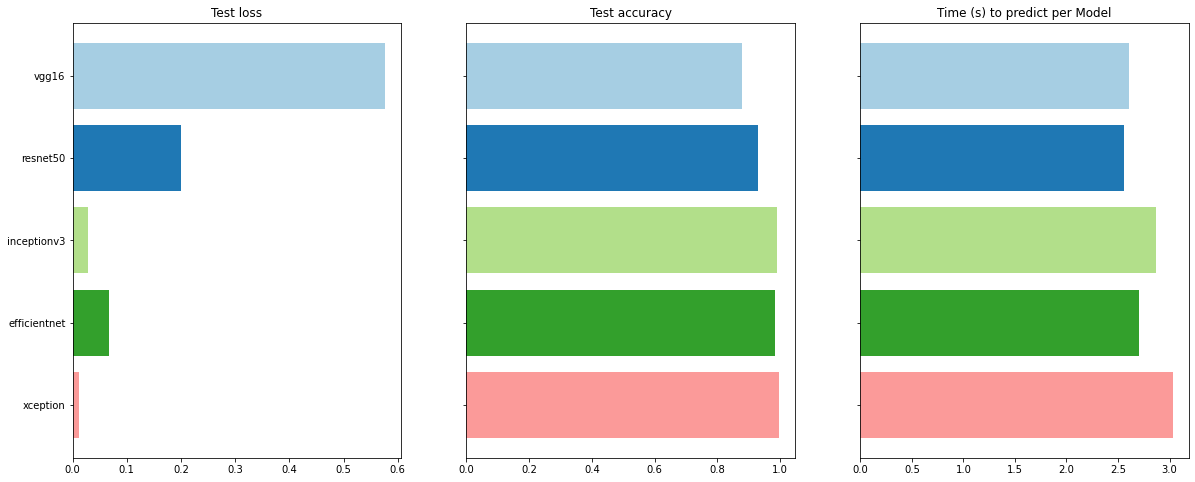

In [ ]:
# Visualization

f, axes = plt.subplots(1, 3, figsize=(20, 8))

# Test loss
axes[0].barh(list_model_name, list_test_loss, color=plt.cm.Paired(np.arange(len(list_test_loss))))
axes[0].set_title('Test loss')
axes[0].invert_yaxis()

# Test accuracy
axes[1].barh(list_model_name, list_test_acc, color=plt.cm.Paired(np.arange(len(list_test_acc))))
axes[1].set_title('Test accuracy')
axes[1].set_yticklabels([])
axes[1].invert_yaxis()

# Time (s) to predict per Model
axes[2].barh(list_model_name, list_time_pred, color=plt.cm.Paired(np.arange(len(list_time_pred))))
axes[2].set_title('Time (s) to predict per Model')
axes[2].set_yticklabels([])
axes[2].invert_yaxis()

In [ ]:
'''
Despite its time prediction, Xception is the model
with the best loss and accuracy scores.

We will use this model in order to predict 50 dog breeds.
Then, the model will try to predict the whole dataset (120 dog breeds).
'''

In [ ]:
#----------------------#
#----------------------#

In [ ]:
# We will now use the Xception model with 50 dog breeds.

In [ ]:
# In order to increase the regularization,
# we will add one Dropout layer

base_model_xception = keras.applications.xception.Xception(
  weights="imagenet",
  include_top=False
)

for layer in base_model_xception.layers:
  layer.trainable = False

In [ ]:
def build_model_xception_50_dog_breeds(hp):
  x = keras.layers.GlobalAveragePooling2D()(base_model_xception.output)

  x = keras.layers.Dropout(
        rate=hp.Choice(
                  'rate1_value',
                  values=[0.3, 0.4, 0.5],
                  default=0.4
        )
      )(x)

  output_ = keras.layers.Dense(50, activation="softmax")(x)

  model_xception = keras.Model(inputs=base_model_xception.input, outputs=output_)

  model_xception.compile(
    optimizer = keras.optimizers.Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
  )

  return model_xception

In [ ]:
tuner_bayesian = kt.BayesianOptimization(
    build_model_xception_50_dog_breeds,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2,
    seed=0,
    overwrite=True
)

In [ ]:
# Dataset for 50 dog breeds.
x_train_xception, x_val_xception, x_test_xception = dataset_for_keras_model(keras.applications.xception.preprocess_input, 10, 299, 50)

tuner_bayesian.search(
    x_train_xception,
    batch_size=10,
    validation_data=x_val_xception,
    epochs=1000,
    callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

Trial 3 Complete [00h 29m 03s]
val_accuracy: 0.9714285731315613

Best val_accuracy So Far: 0.9744897782802582
Total elapsed time: 01h 44m 31s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hyperparameters = tuner_bayesian.get_best_hyperparameters()[0]
print(best_hyperparameters.values)

{'rate1_value': 0.5}


In [ ]:
model_xception = tuner_bayesian.hypermodel.build(best_hyperparameters)

In [ ]:
#----------------------#

In [ ]:
history_xception = model_xception.fit(
    x_train_xception,
    epochs=1000,
    batch_size=10,
    validation_data=x_val_xception,
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

Epoch 1/1000
505/505 [==============================] - 4034s 8s/step - loss: 1.5562 - accuracy: 0.7058 - val_loss: 0.1580 - val_accuracy: 0.9653
Epoch 2/1000
505/505 [==============================] - 120s 238ms/step - loss: 0.1920 - accuracy: 0.9544 - val_loss: 0.1174 - val_accuracy: 0.9714
Epoch 3/1000
505/505 [==============================] - 119s 237ms/step - loss: 0.1452 - accuracy: 0.9578 - val_loss: 0.1178 - val_accuracy: 0.9571
Epoch 4/1000
505/505 [==============================] - 119s 235ms/step - loss: 0.1157 - accuracy: 0.9672 - val_loss: 0.1171 - val_accuracy: 0.9694
Epoch 5/1000
505/505 [==============================] - 119s 236ms/step - loss: 0.1221 - accuracy: 0.9611 - val_loss: 0.1221 - val_accuracy: 0.9612
Epoch 6/1000
505/505 [==============================] - 118s 233ms/step - loss: 0.0812 - accuracy: 0.9781 - val_loss: 0.1129 - val_accuracy: 0.9653
Epoch 7/1000
505/505 [==============================] - 118s 233ms/step - loss: 0.0799 - accuracy: 0.9779 - val_lo

In [ ]:
model_xception.evaluate(x_test_xception, verbose=1)

50/50 [==============================] - 346s 7s/step - loss: 0.1267 - accuracy: 0.9560


[0.12668199837207794, 0.9559999704360962]

In [ ]:
# Saving this model
model_xception.save("/content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P6/Projet/transfert_learning_xception_50_19042021.h5")

In [ ]:
for layer in base_model_xception.layers:
  layer.trainable = True

model_xception.compile(
    optimizer = keras.optimizers.Adam(1e-6),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_xception = model_xception.fit(
    x_train_xception,
    epochs=1000,
    batch_size=10,
    validation_data=x_val_xception,
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

Epoch 1/1000
505/505 [==============================] - 151s 291ms/step - loss: 0.2837 - accuracy: 0.9140 - val_loss: 0.1583 - val_accuracy: 0.9510
Epoch 2/1000
505/505 [==============================] - 144s 286ms/step - loss: 0.2363 - accuracy: 0.9250 - val_loss: 0.1547 - val_accuracy: 0.9531
Epoch 3/1000
505/505 [==============================] - 143s 284ms/step - loss: 0.2282 - accuracy: 0.9266 - val_loss: 0.1488 - val_accuracy: 0.9531
Epoch 4/1000
505/505 [==============================] - 143s 284ms/step - loss: 0.1891 - accuracy: 0.9442 - val_loss: 0.1472 - val_accuracy: 0.9571
Epoch 5/1000
505/505 [==============================] - 143s 284ms/step - loss: 0.1954 - accuracy: 0.9362 - val_loss: 0.1475 - val_accuracy: 0.9571
Epoch 6/1000
505/505 [==============================] - 144s 284ms/step - loss: 0.1723 - accuracy: 0.9423 - val_loss: 0.1427 - val_accuracy: 0.9612
Epoch 7/1000
505/505 [==============================] - 143s 284ms/step - loss: 0.1822 - accuracy: 0.9400 - val_

In [ ]:
model_xception.evaluate(x_test_xception, verbose=1)

50/50 [==============================] - 3s 65ms/step - loss: 0.1480 - accuracy: 0.9400


[0.14799629151821136, 0.9399999976158142]

In [ ]:
'''
The fine tuning is, once again, reducing the accuracy.
We will keep the model without fine tuning.

Our model based on Xception can reach 95,60% of accuracy with 50 dog breeds.
'''

In [ ]:
#----------------------#

In [ ]:
# Confusion Matrix

In [ ]:
list_label = []
y_true_label = []
list_images_test_url = []

path = "/content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P6/Projet/Data/Images_few_50/test/"
list_repository = os.listdir(path)


list_label = list_repository

for i in range(len(list_repository)):  
  list_files = os.listdir(path + list_repository[i])
  for j in range(len(list_files)):
    y_true_label.append(list_repository[i])
    list_images_test_url.append(path + list_repository[i] + "/" + list_files[j])

In [ ]:
le_50_dog_breeds = LabelEncoder()
le_50_dog_breeds.fit(list_label)

y_true = le_50_dog_breeds.transform(y_true_label)

In [ ]:
y_pred = []

for i in range(len(list_images_test_url)):
  img = keras.preprocessing.image.load_img(list_images_test_url[i], target_size=(299, 299))
  img = keras.preprocessing.image.img_to_array(img)

  # reshape into a single sample with 3 channels
  img = np.expand_dims(img, axis=0)
  # img = img.reshape(1, 299, 299, 3)
  
  img = keras.applications.xception.preprocess_input(img)
    
  y_pred.append(np.argmax(model_xception.predict(img).flatten()))

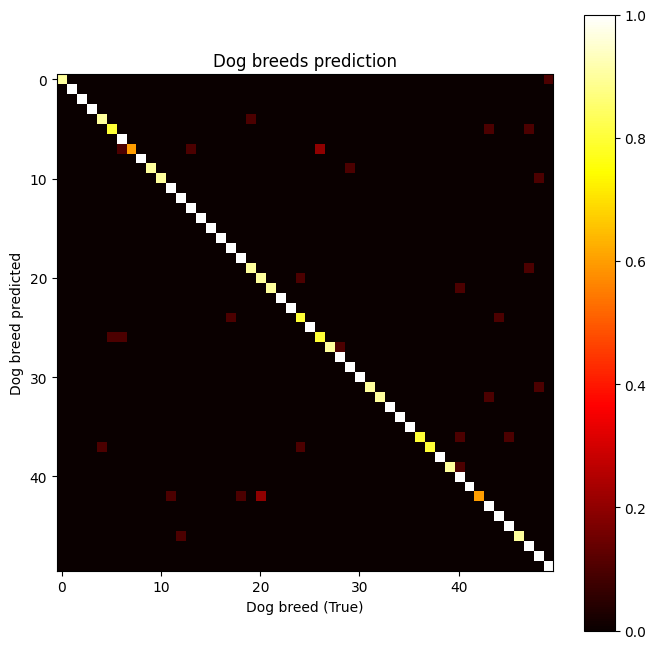

In [ ]:
# Confusion matrix
result = confusion_matrix(y_true, y_pred)

# Normalizing the confusion matrix
result = result / result.astype(np.float).sum(axis=1)

plt.style.use(['default'])

fig, ax = plt.subplots(figsize=(8,8))

c = ax.imshow(result, cmap='hot')
ax.set_title('Dog breeds prediction')
ax.set_xlabel('Dog breed (True)')
ax.set_ylabel('Dog breed predicted')

# set the limits of the plot to the limits of the data
fig.colorbar(c, ax=ax)

plt.show()

In [ ]:
#----------------------#
#----------------------#

In [ ]:
# 120 classes with the best model : xception

In [ ]:
# Because of the images number, we are not able to train multiple CNN.
# We will use the same strategy as previously (50 dog breeds),
# i.e. the xception model with a dropout layer and a fully connected layer.

In [ ]:
base_model_xception = keras.applications.xception.Xception(
  weights="imagenet",
  include_top=False
)

x = keras.layers.GlobalAveragePooling2D()(base_model_xception.output)

x = keras.layers.Dropout(0.5)(x)

output_ = keras.layers.Dense(120, activation="softmax")(x)

model_xception_full = keras.Model(inputs=base_model_xception.input, outputs=output_)

In [ ]:
for layer in base_model_xception.layers:
  layer.trainable = False

model_xception_full.compile(
    optimizer = keras.optimizers.Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Dataset for 120 classes
x_train_xception_full, x_val_xception_full, x_test_xception_full = dataset_for_keras_model(keras.applications.xception.preprocess_input, 10, 299, 120)

history_xception_full = model_xception_full.fit(
    x_train_xception_full,
    epochs=1000,
    batch_size=10,
    validation_data=x_val_xception_full,
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

# Saving this model
model_xception_full.save("/content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P6/Projet/transfert_learning_xception_full_19042021.h5")

model_xception_full.evaluate(x_test_xception_full, verbose=1)

Found 12307 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.
Found 4200 images belonging to 120 classes.
Epoch 1/1000
1231/1231 [==============================] - 11295s 9s/step - loss: 1.6762 - accuracy: 0.6517 - val_loss: 0.3241 - val_accuracy: 0.9023
Epoch 2/1000
1231/1231 [==============================] - 296s 241ms/step - loss: 0.3672 - accuracy: 0.8868 - val_loss: 0.3145 - val_accuracy: 0.8991
Epoch 3/1000
1231/1231 [==============================] - 293s 238ms/step - loss: 0.3320 - accuracy: 0.8898 - val_loss: 0.3048 - val_accuracy: 0.9013
Epoch 4/1000
1231/1231 [==============================] - 293s 238ms/step - loss: 0.3031 - accuracy: 0.8975 - val_loss: 0.3138 - val_accuracy: 0.8964
Epoch 5/1000
1231/1231 [==============================] - 292s 238ms/step - loss: 0.2706 - accuracy: 0.9084 - val_loss: 0.3122 - val_accuracy: 0.8996
Epoch 6/1000
1231/1231 [==============================] - 293s 238ms/step - loss: 0.2741 - accuracy: 0.9072 - val_loss

[0.33845940232276917, 0.8930952548980713]

In [ ]:
'''
Our model based on Xception can reach 89.31% of accuracy with 120 dog breeds.
'''

In [ ]:
#----------------------#

In [ ]:
# Confusion Matrix

In [9]:
list_label = []
y_true_label = []
list_images_test_url = []

path = "/content/drive/MyDrive/Gaetan_Travail/ML/Formation_OC_IML/P6/Projet/Data/Images_split/test/"
list_repository = os.listdir(path)


list_label = list_repository

for i in range(len(list_repository)):  
  list_files = os.listdir(path + list_repository[i])
  for j in range(len(list_files)):
    y_true_label.append(list_repository[i])
    list_images_test_url.append(path + list_repository[i] + "/" + list_files[j])

In [10]:
le_120_dog_breeds = LabelEncoder()
le_120_dog_breeds.fit(list_label)

y_true = le_120_dog_breeds.transform(y_true_label)

In [11]:
y_pred = []

for i in range(len(list_images_test_url)):
  img = keras.preprocessing.image.load_img(list_images_test_url[i], target_size=(299, 299))
  img = keras.preprocessing.image.img_to_array(img)

  # reshape into a single sample with 3 channels
  img = np.expand_dims(img, axis=0)
  # img = img.reshape(1, 299, 299, 3)
  
  img = keras.applications.xception.preprocess_input(img)
    
  y_pred.append(np.argmax(model_xception_full.predict(img).flatten()))

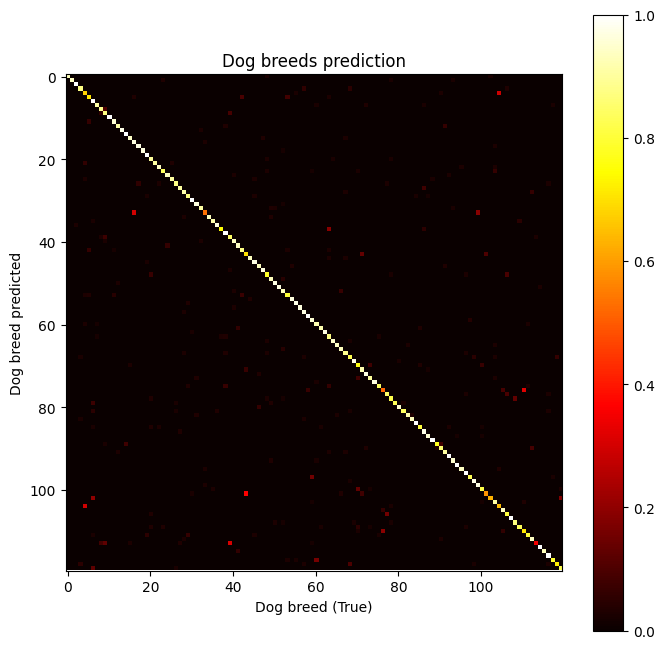

In [12]:
# Confusion matrix
result = confusion_matrix(y_true, y_pred)

# Normalizing the confusion matrix
result = result / result.astype(np.float).sum(axis=1)

plt.style.use(['default'])

fig, ax = plt.subplots(figsize=(8,8))

c = ax.imshow(result, cmap='hot')
ax.set_title('Dog breeds prediction')
ax.set_xlabel('Dog breed (True)')
ax.set_ylabel('Dog breed predicted')

# set the limits of the plot to the limits of the data
fig.colorbar(c, ax=ax)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true, y_pred, target_names=list_label))

                                precision    recall  f1-score   support

American_Staffordshire_terrier       1.00      0.93      0.97        30
                   Appenzeller       1.00      0.94      0.97        49
                 Affenpinscher       0.97      1.00      0.99        35
            Australian_terrier       0.90      0.88      0.89        41
                       Basenji       0.61      0.68      0.64        34
                      Airedale       0.81      0.71      0.76        31
           African_hunting_dog       0.66      1.00      0.79        40
                  Afghan_hound       0.95      0.91      0.93        43
                        Basset       0.84      0.89      0.86        35
                        Beagle       0.71      0.87      0.78        39
          Bernese_mountain_dog       1.00      1.00      1.00        37
            Bedlington_terrier       0.93      0.96      0.95        45
       Black-and-tan_coonhound       0.94      0.91      0.92  